In [14]:
import re
import matplotlib.pyplot as plt
import numpy as np

def extract_frequencies(filename):
    d = dict()
    with open(filename, "r") as f:
        for line in f:
            line = line.lower().rstrip().split(' ')
            for word in line:
                word = re.sub(r'\W+', '', word)
                if word:
                    d[word] = d.get(word, 0) + 1
    return d

def dump(dic, filename):
    with open(filename, "w") as f:
        for k, v in dic.items():
            f.write("{},{}\n".format(k, v))

def build_histogram(filename, outputfilename=None, limit=20):
    # open file and extract data
    data = []
    with open(filename, "r") as f:
        for i, line in enumerate(f):
            line = line.lower().rstrip().split(',')
            data.append((int(line[1]), line[0]))
    data.sort(key=lambda d: d[0], reverse=True)

    # process data
    data = data[:limit]
    words = []
    freq = []
    for d in data:
        words.append(d[1])
        freq.append(d[0])

    # print top 'limit' most frequent words
    i = 1
    for data in zip(words, freq):
        print("No.{}\t\"{}\" : {}".format(i, data[0], data[1]))
        i += 1
        
    # plot the data
    y_pos = np.arange(len(words))
    plt.bar(y_pos, freq, align='center', alpha=0.5)
    plt.xticks(y_pos, words)
    plt.ylabel('Occurence')
    plt.title('Word Frequency in {}'.format(filename))
    if outputfilename:
        plt.savefig(outputfilename+'.png')
    plt.show()

No.1	"the" : 5798
No.2	"and" : 3070
No.3	"i" : 2994
No.4	"of" : 2776
No.5	"to" : 2761
No.6	"a" : 2681
No.7	"in" : 1815
No.8	"that" : 1750
No.9	"it" : 1710
No.10	"you" : 1543


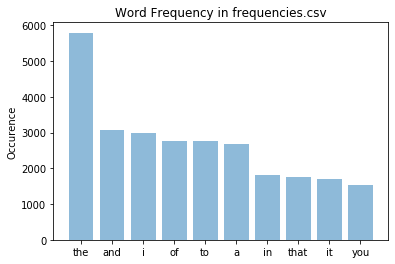

In [26]:
>>> frequencies = extract_frequencies("C:\sherlock-holmes.txt")
>>> dump(frequencies, "frequencies.csv")
>>> build_histogram("frequencies.csv", "frequencies", 10)